In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle('1639639084.test_baa.pickle')
df['real_cnots_norm'] = df['real_cnots'] / df['real_cnots_no_approx']
df['entganglement (max-MW)'] = df['entganglement (max-MW)'].apply(lambda v: v.item() * 4)
df['entganglement (min-MW)'] = df['entganglement (min-MW)'].apply(lambda v: v.item() * 4)
df['predicted_cnots'] = df.cnots - df.total_saved_cnots

In [34]:
df[['with_low_rank', 'strategy', 'max_fidelity_loss', 'duration']]

,with_low_rank,strategy,max_fidelity_loss,duration
0,False,brute_force,0.1,0.875001
1,False,greedy,0.1,1.003100
2,True,brute_force,0.1,1.265692
3,True,greedy,0.1,1.250030
4,False,brute_force,0.2,0.687472
...,...,...,...,...
39995,True,greedy,0.9,0.109373
39996,False,brute_force,1.0,0.109375
39997,False,greedy,1.0,0.078689
39998,True,brute_force,1.0,0.124999


In [31]:
df[~df.saved_cnots_calculation_pass][['real_cnots', 'predicted_cnots']]

,real_cnots,predicted_cnots
0,26,30
280,7,8
281,7,8
282,7,8
283,7,8
...,...,...
39930,3,4
39931,6,7
39932,3,4
39934,3,4


<AxesSubplot:xlabel='max_fidelity_loss', ylabel='total_fidelity_loss'>

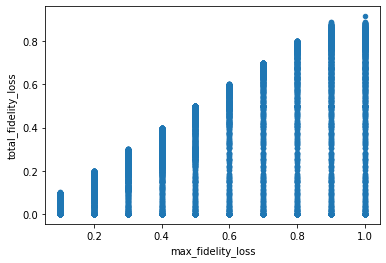

In [32]:
df[(df.strategy == 'brute_force') & df.with_low_rank].plot.scatter(x='max_fidelity_loss', y='total_fidelity_loss')

In [5]:
max_fidelity_loss = 0.1
data = df[(np.abs(df.max_fidelity_loss - max_fidelity_loss) < 1e-6) & (df.strategy == 'brute_force') & df.with_low_rank] \
    [['entganglement', 'entganglement (MW)', 'entganglement (min-MW)', 'entganglement (max-MW)', 'real_cnots', 'real_cnots_no_approx', 'real_cnots_norm']]
data

,entganglement,entganglement (MW),entganglement (min-MW),entganglement (max-MW),real_cnots,real_cnots_no_approx,real_cnots_norm
2,0.324618,0.433566,0.000000,0.743126,14,26,0.538462
42,0.000000,0.000000,0.000000,0.000000,0,0,NaN
82,0.826186,0.953934,0.881180,0.998171,84,150,0.560000
122,0.548289,0.772474,0.566535,0.833397,36,151,0.238411
162,0.000000,0.000000,0.000000,0.000000,0,0,NaN
...,...,...,...,...,...,...,...
39802,0.557524,0.719353,0.073162,0.913553,36,142,0.253521
39842,0.000000,0.000000,0.000000,0.000000,0,0,NaN
39882,0.482265,0.404694,0.000000,0.974615,4,9,0.444444
39922,0.515164,0.431140,0.000000,0.999398,3,7,0.428571


In [21]:
%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 5))
ax = Axes3D(fig)
ax.set_xlabel('entganglement (MW)')
ax.set_ylabel('entganglement')
ax.set_zlabel('real_cnots')

max_fidelity_loss = 0.1
data = df[(np.abs(df.max_fidelity_loss - max_fidelity_loss) < 1e-6) & (df.strategy == 'brute_force') & df.with_low_rank]

ax.scatter(data['entganglement (max-MW)'], data['entganglement'], data['real_cnots'])

<IPython.core.display.Javascript object>

C:\Users\cncen\AppData\Local\Temp/ipykernel_4092/3675472228.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


In [42]:
plt_df = df[(df.strategy == 'brute_force') & (df.with_low_rank)].groupby('max_fidelity_loss') \
    .agg({'real_cnots': 'max', 'entganglement': 'max', 'entganglement (MW)': 'max', 'predicted_cnots': 'max', 'real_depth': 'max'})  # .reset_index().plot(0, 1)
plt_df['real_cnots_norm'] = plt_df['real_cnots'] / 153
plt_df['predicted_cnots_norm'] = plt_df['predicted_cnots'] / 153
plt_df['depth_ratio'] = plt_df['predicted_cnots'] /  plt_df['real_depth']
plt_df

,real_cnots,entganglement,entganglement (MW),predicted_cnots,real_depth,real_cnots_norm,predicted_cnots_norm,depth_ratio
max_fidelity_loss,,,,,,,,
0.1,153,0.899653,0.990809,153,470,1.000000,1.000000,0.325532
0.2,84,0.899653,0.990809,84,221,0.549020,0.549020,0.380090
0.3,84,0.899653,0.990809,84,221,0.549020,0.549020,0.380090
0.4,36,0.899653,0.990809,36,98,0.235294,0.235294,0.367347
0.5,36,0.899653,0.990809,36,98,0.235294,0.235294,0.367347
0.6,36,0.899653,0.990809,36,98,0.235294,0.235294,0.367347
0.7,13,0.899653,0.990809,13,20,0.084967,0.084967,0.650000
0.8,5,0.899653,0.990809,5,17,0.032680,0.032680,0.294118
0.9,0,0.899653,0.990809,0,2,0.000000,0.000000,0.000000


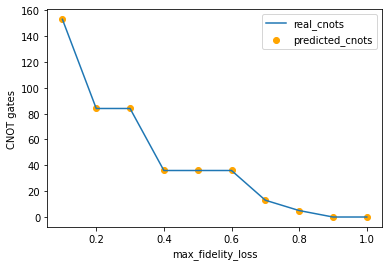

In [43]:
%matplotlib inline
# plt.plot(plt_df.index, plt_df.real_depth, label='real_cnots')
plt.plot(plt_df.index, plt_df.real_cnots, label='real_cnots')
plt.scatter(x=plt_df.index, y=plt_df.predicted_cnots, label='predicted_cnots', color='orange')
plt.legend()
plt.xlabel('max_fidelity_loss')
plt.ylabel('CNOT gates')
plt.show()

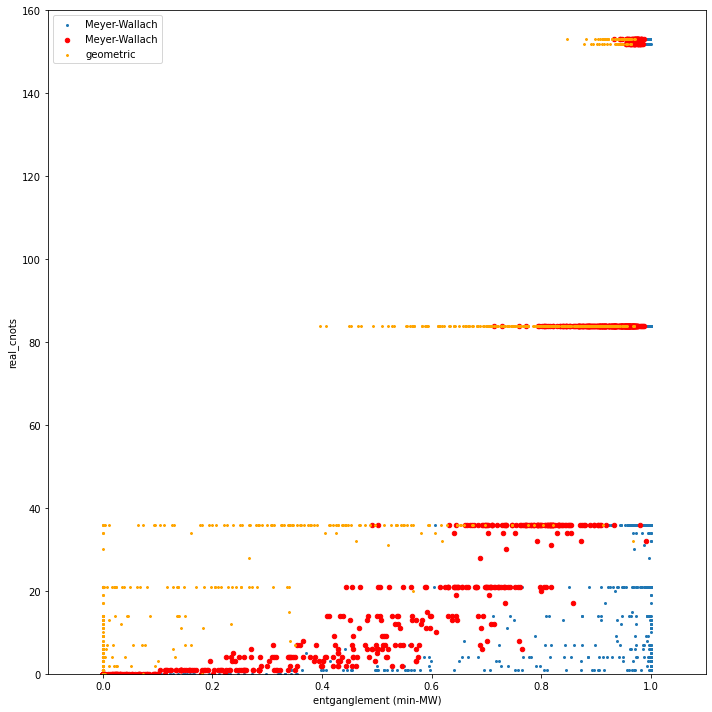

In [16]:
%matplotlib inline

from matplotlib.figure import Figure, Axes

figure: Figure = plt.figure(figsize=(10, 10))
ax: Axes = figure.add_subplot()

max_fidelity_loss = 0.1
data = df[(np.abs(df.max_fidelity_loss - max_fidelity_loss) < 1e-6) & (df.strategy == 'brute_force') & df.with_low_rank]
data[['entganglement (max-MW)', 'real_cnots']].plot.scatter(x=0, y=1, xlim=(-0.1, 1.1), ax=ax, label='Meyer-Wallach', s=4)
data[['entganglement (MW)', 'real_cnots']].plot.scatter(x=0, y=1, xlim=(-0.1, 1.1), ax=ax, label='Meyer-Wallach', color='red')
data[['entganglement (min-MW)', 'real_cnots']].plot.scatter(x=0, y=1, xlim=(-0.1, 1.1), color='orange', ax=ax, label='geometric', marker='x', s=4)
ax.set_ylim(0, 160)
# figure.legend()
figure.tight_layout()
# figure.suptitle(f'Fidelity Loss {max_fidelity_loss}, 7qb state, 153 cnots')

In [17]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [18]:
clf = DecisionTreeRegressor(max_depth=2, criterion='absolute_error')
clf.fit(data[['entganglement', 'entganglement (MW)', 'entganglement (min-MW)', 'entganglement (max-MW)']], data['real_cnots'])

DecisionTreeRegressor(criterion='absolute_error', max_depth=2)

[Text(1116.0, 1812.0, 'X[2] <= 0.449\nabsolute_error = 38.027\nsamples = 1000\nvalue = 21.0'),
 Text(558.0, 1087.2, 'X[1] <= 0.579\nabsolute_error = 8.109\nsamples = 595\nvalue = 1.0'),
 Text(279.0, 362.39999999999986, 'absolute_error = 2.211\nsamples = 451\nvalue = 0.0'),
 Text(837.0, 362.39999999999986, 'absolute_error = 9.174\nsamples = 144\nvalue = 21.0'),
 Text(1674.0, 1087.2, 'X[2] <= 0.933\nabsolute_error = 17.168\nsamples = 405\nvalue = 84.0'),
 Text(1395.0, 362.39999999999986, 'absolute_error = 11.553\nsamples = 342\nvalue = 84.0'),
 Text(1953.0, 362.39999999999986, 'absolute_error = 22.825\nsamples = 63\nvalue = 152.0')]

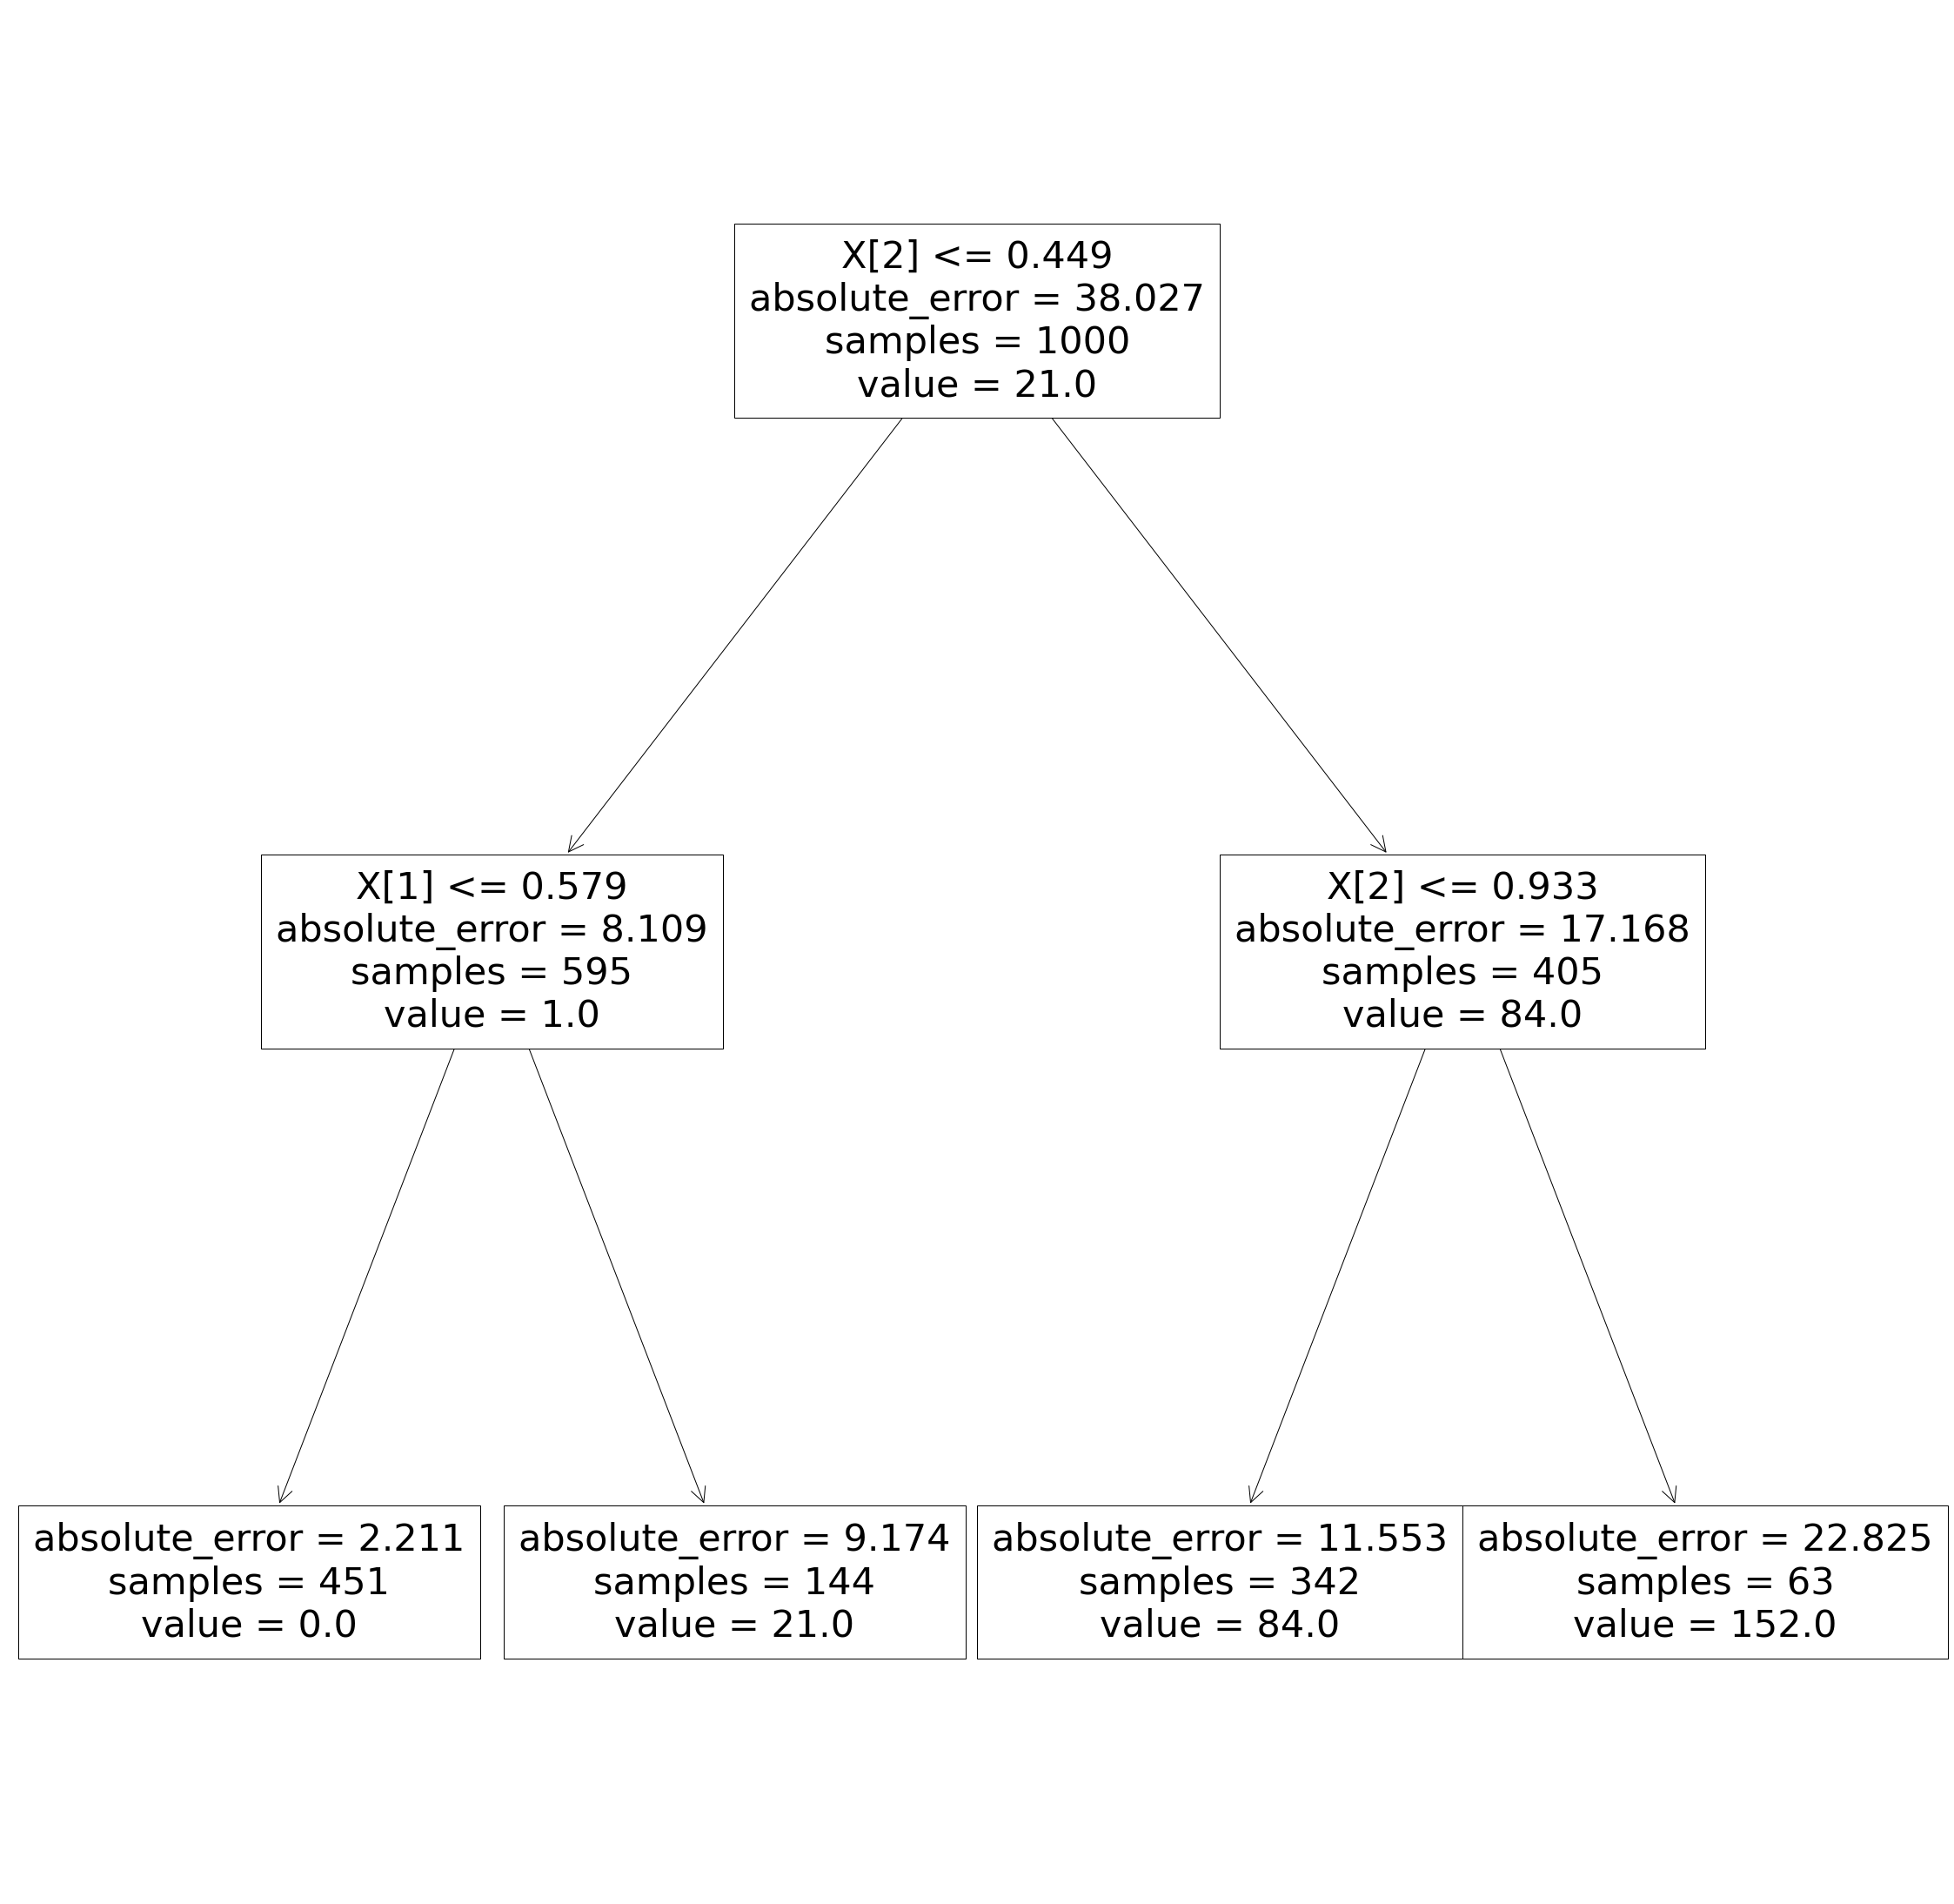

In [19]:
%matplotlib inline


from matplotlib.figure import Figure

figure: Figure = plt.figure(figsize=(40, 40))
ax = figure.add_subplot()
plot_tree(clf, ax=ax)

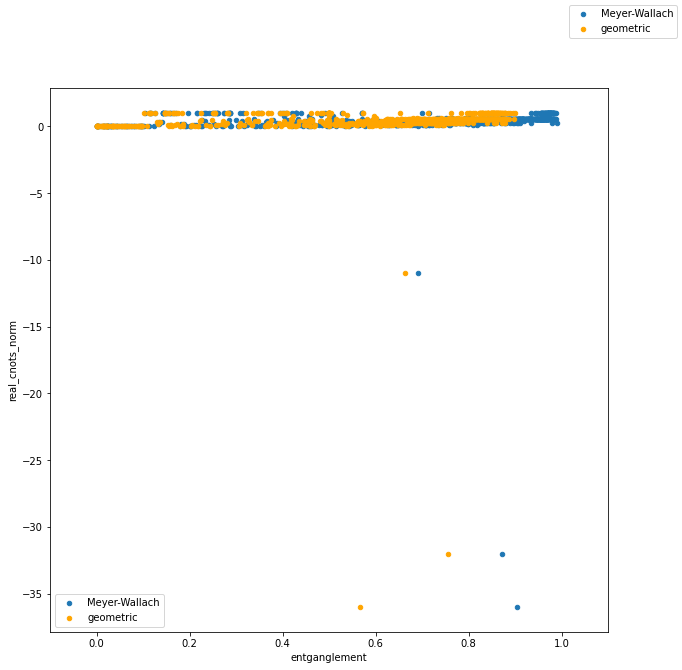

In [41]:
figure: Figure = plt.figure(figsize=(10, 10))
ax = figure.add_subplot()

max_fidelity_loss = 0.1
data = df[(np.abs(df.max_fidelity_loss - max_fidelity_loss) < 1e-6) & (df.strategy == 'brute_force') & df.with_low_rank]
data[['entganglement (MW)', 'real_cnots_norm']] \
    .plot.scatter(x=0, y=1, xlim=(-0.1,1.1), ax=ax, label='Meyer-Wallach')
    # .plot.scatter(x=0, y=1, xlim=(-0.1,1.1), ylim=(-0.1,1.1), ax=ax, label='entganglement (MW)')
# plt.axhline(max_fidelity_loss, color='red', ax=ax)

data[['entganglement', 'real_cnots_norm']] \
    .plot.scatter(x=0, y=1, xlim=(-0.1,1.1), color='orange', ax=ax, label='geometric')
    # .plot.scatter(x=0, y=1, xlim=(-0.1,1.1), ylim=(-0.1,1.1), color='orange', ax=ax, label='entganglement')
# plt.axvline(max_fidelity_loss, color='red', ax=ax)
figure.legend()

In [74]:
%matplotlib notebook

In [1]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 5))
ax = Axes3D(fig)
ax.set_xlabel('entganglement (MW)')
ax.set_ylabel('entganglement')
ax.set_zlabel('real_cnots_norm')

max_fidelity_loss = 0.1
data = df[(np.abs(df.max_fidelity_loss - max_fidelity_loss) < 1e-6) & (df.strategy == 'brute_force') & df.with_low_rank]

ax.scatter(data['entganglement (MW)'], data['entganglement'], data['real_cnots_norm'])

NameError: name 'plt' is not defined

In [12]:
from test import test_baa
import numpy as np
from qclib.state_preparation.util import baa

state = np.zeros(256)
state[0] = 2**(-0.5)
state[-1] = 2**(-0.5)

baa.geometric_entanglement(state), test_baa.calculate_entropy_meyer_wallach(state)

(0.4999999999999999, 1.0000000000000004)